# Clustering

### Clustering algorithms use differnt distance or similarity or dissimilarity measures to derive different clusters. The type of distance or similarity measure used plays a crucial role in the final cluster formation Larger distance would imply that observations are far away from one another, whereas higher similarity would indicate that the observations are similar.

In [1]:
import pandas as pd
customer_df = pd.read_csv("Income Data.csv")

In [2]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [3]:
customer_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

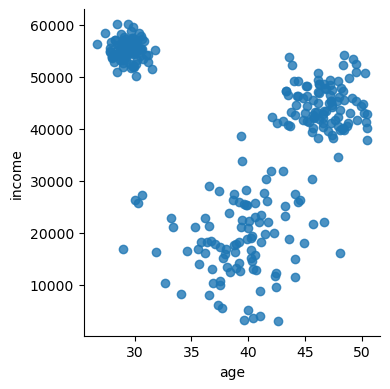

In [12]:
sn.lmplot(x="age", y="income", data=customer_df, fit_reg = False, height = 4)

# 3 customer Segments can be seen from the above graph
1. One on the top-left side of the graph, depicting low-age-high income group.
2. One on the top-right side of the graph, depicting high-age-meidum income group.
3. One on the bottom of the graph, depicting a low-income group, with has an average age spread from low to high.

# K-MEANS CLUSTERING
K-means clustering is one of the frequently used clustering algorithms. It is a non-hierarchical clustering method in which the number of clusters (K) is decided a priori. The observations in the sample are assigned to one of the clusters based on the distance betwen the observation and the centroid of the clusters.

The following steps are used in K-Means clustering algorithm:
1. Decide the value of K
2. Choose K observations from the data that are likely to be in differnt clusters. There are many ways of choosing these initial K values; the easist approach is to choose observations that are farthest (in one of the parameters of the data)
3. The K observations selected in Step-2 are the centroids of those clusters
4. For remaining observations, find the cluster closest to the Centroid. Add the new observation to the cluster with the closest centroid. Adjust the centroid after adding a new observation to the cluster. The closest centroid is chosed based upon an appropriate distance measure.
5. Repeat step-4 until all observat

In [13]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customer_df)

KMeans(n_clusters=3)

In [14]:
customer_df["clusterid"] = clusters.labels_

In [15]:
customer_df[0:5]

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


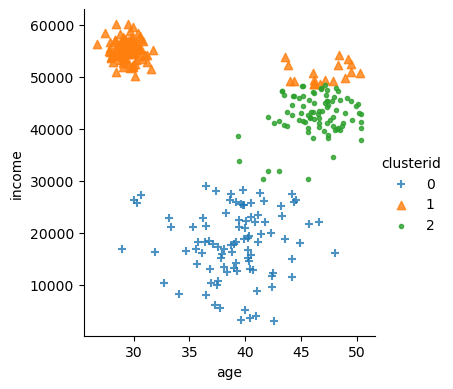

In [16]:
# Plotting Customers with their Segments
import seaborn as sn
markers = ['+', '^', '.']
sn.lmplot(x = "age", y = "income", data = customer_df, hue = "clusterid", fit_reg = False, markers = markers, height = 4)

### The above clusters are mostly segmented based on income. This is because the salary is on a larger scale compared to the age. The scale of age is 0 to 60, while salary ranges from 0 to 50000. 
For Example, difference in age between two customers, with age 20 and 70, is significant, but numical differences is only 50. Simliarly, difference in income between tow customers, with income bdttwee two customers, with income of 10000 and 11000 is not significant; the numerical difference is 1000, so the distance will always
be determined by the difference in salary and not in age. Hence before creating clusters, all features need to be normalized and brought to normalized scale. StandardScalar in sklearn.preprocessing normalizes all values by subtacting all values from its mean and dividing by standard deviation.

In [18]:
# Normalizing features
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaled_customer_df = scaler.fit_transform(customer_df[["age", "income"]])

In [21]:
scaled_customer_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [27]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3)
clusters_new.fit(scaled_customer_df)
customer_df["clusterid_new"] = clusters_new.labels_

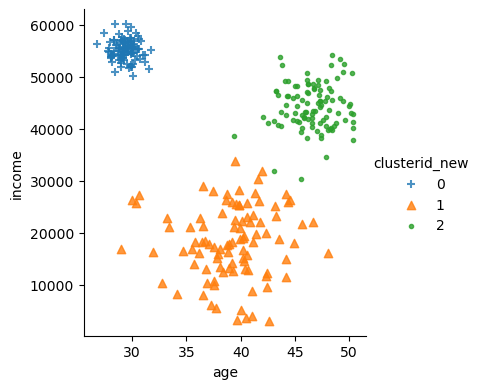

In [31]:
markers = ["+","^","."]
sn.lmplot(x = "age", y = "income", data = customer_df, hue = "clusterid_new", fit_reg = False, markers = markers, height = 4)

In [32]:
# Now the clusters seem to have been created properly. The Cluster centers are given by clusters.cluster_cdnters_
clusters.cluster_centers_

array([[1.78851064e+04, 3.90808511e+01, 1.40425532e+00],
       [5.45211864e+04, 3.20733051e+01, 5.55111512e-16],
       [4.25761364e+04, 4.63562500e+01, 1.36363636e-01]])

In [35]:
# Cluster centers and Interpreting the Clusters
customer_df.groupby('clusterid_new')[['age', 'income']].agg(["mean", "std"]).reset_index()

clusterid_new        age                  income             
                      mean       std          mean          std
0             0  29.384000  0.921458  55204.000000  1951.943864
1             1  39.140206  3.558665  18321.649485  6924.747691
2             2  46.627184  2.151559  44308.737864  4390.321503

# The clusters can be interpreted as follows:
1. Cluster-0: Customers with mean age of 29 and income of 55K. Low age and high income.
2. Clusster-1: Customers with mean age of 39 and income of 18K. Mid age and low income.
3. Cluster-2: Customers with mean age of 46 and income of 44L. High age and mid income.

# Creating Product Segments using Clustering
Example Beer Dataset

In [36]:
import pandas as pd
import numpy as np


In [37]:
beer_df = pd.read_csv("beer.csv")

In [38]:
beer_df.head(5)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [39]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 932.0+ bytes


In [42]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[['calories','sodium', 'alcohol', 'cost']])

In [62]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(scaled_beer_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [63]:
import seaborn as sn


In [64]:
cmap = sn.cubehelix_palette (as_cmap=True, rot=-3, light=1)

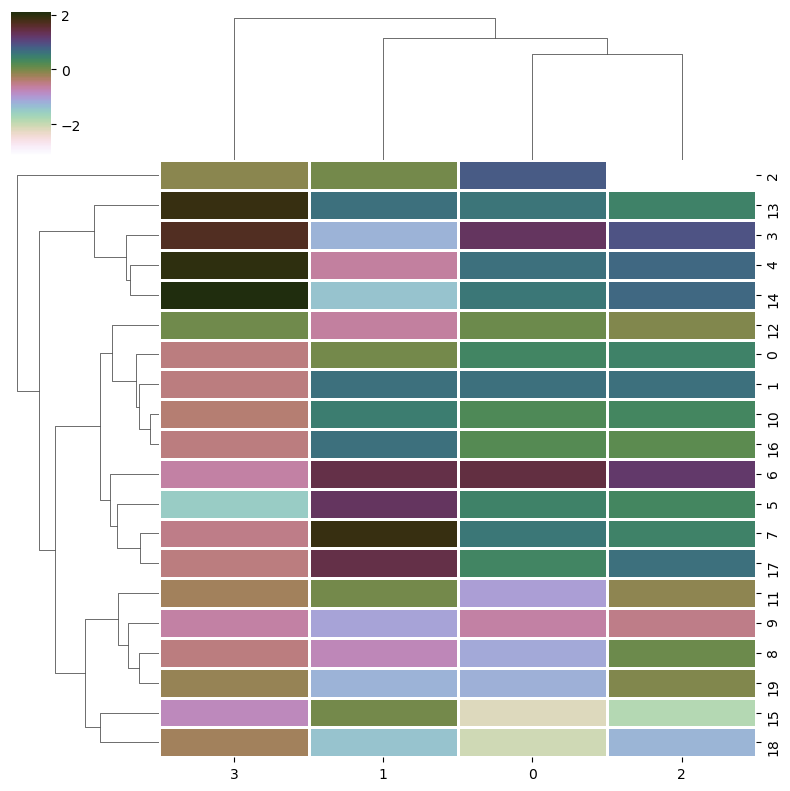

In [65]:
sn.clustermap(scaled_beer_df, cmap=cmap, linewidth = 2, figsize = (8,8))

In [66]:
# The distance between beer brand 10 and 16 is least. They seem to be very similar to each other
beer_df.iloc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [67]:
# The distance between beer brand 2 and 18 is largest. They seem to be very different from each other
beer_df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


In [69]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


# Finding Optimal Number of Clusters using Elbow Curve Method
If we assume all the products belong to only one segment, then the variance of the cluster will be the highest. Aas we increase the number of clusters, the total variance will start reducing. But the total variance will be zerio, if we assume each porudct isa  cluster by itself. So, Elbow curve method considers the precentage of variance explained as a function of the number of clusters. The optimal number of clusters is chosed in sucah a way that adding another cluster does not change the variance explained signnificantly

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[["calories","sodium", "alcohol", "cost"]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

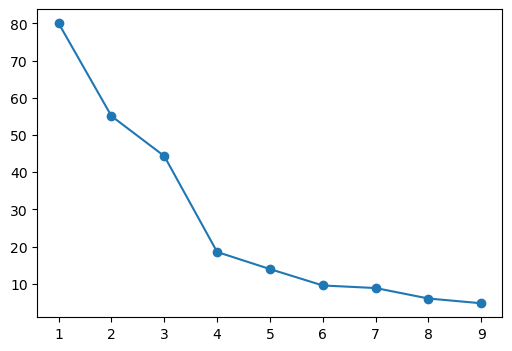

In [71]:

cluster_range = range(1,10)
cluster_errors = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker ="o")

In [73]:
k =3
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_beer_df)
beer_df["clusterid"] = clusters.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
13,Becks,150,19,4.7,0.76,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [79]:
type(beer_df)

pandas.core.frame.DataFrame

In [80]:
beer_df.shape

(20, 6)

In [81]:
beer_df

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,2
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1


In [82]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
13,Becks,150,19,4.7,0.76,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [85]:
# beer_df[beer_df.clusterid == 0 & beer_df.calories == 144]
# df[(df['column1'] > value1) & (df['column2'] < value2)]
beer_df[(beer_df.clusterid == 0) & (beer_df.calories == 144)]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


# Hierarchical Clustering
Hierarchical Clustering is a clustering algorithm which uses the following steps to develop clusters.
1. Start with each data point in a single cluster.
2. Find the data points with shortest distance and merge them to form a cluster
3. Repeat step2 untill all data points are merged together to form a single cluster


In [87]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
h_clusters = AgglomerativeClustering(3)

In [91]:
h_clusters.fit(scaled_beer_df)

AgglomerativeClustering(n_clusters=3)

In [92]:
beer_df["h_clusterid"] = h_clusters.labels_

In [93]:
beer_df

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,2,0
3,Kronenbourg,170,7,5.2,0.73,1,2
4,Heineken,152,11,5.0,0.77,1,2
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
